In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import pickle

In [3]:
import torch
import numpy as np
import pandas as pd
from tqdm.notebook import trange
from matplotlib import pyplot as plt

In [4]:
from lared_dataset.data_loading.dataset import FatherDataset, FatherDatasetSubset
from lared_dataset.data_loading.extractors import VideoExtractor, AccelExtractor
from lared_dataset.data_loading.utils import get_track_rectangle, tlwh_to_tlbr, enlarge_rectangle
from lared_dataset.constants import (
    processed_data_path, 
    processed_accel_path, 
    processed_videos_path,
    examples_path)
from lared_dataset.baselines.video.transforms import get_kinetics_val_transform

In [5]:
extractors = {}
examples = pickle.load(open(examples_path, 'rb'))
videos_path = os.path.join(processed_videos_path, 'examples')
# extractors['video'] = VideoExtractor(videos_path, transform=get_kinetics_val_transform(8, 256, False))

accel_ds_path = os.path.join(processed_accel_path, 'subj_accel_interp.pkl')
extractors['accel'] = AccelExtractor(accel_ds_path)

ds = FatherDataset(examples, extractors)

In [6]:
for i in trange(len(ds)):
    try:
        e = ds[i]
        assert e['accel'].shape[0] == 3 and e['accel'].shape[1] == 60, f'{e["accel"].shape[0]}'
        assert e['interp_vad'].shape[0] == 60
    except:
        print(f'error in {i}')

  0%|          | 0/16403 [00:00<?, ?it/s]

In [27]:
labels = ds.get_all_labels()

In [28]:
len(labels)

16403

# Dataset stats

In [33]:
examples = pickle.load(open(examples_path, 'rb'))
accel = pickle.load(open(os.path.join(processed_accel_path, 'subj_accel_interp.pkl'), 'rb'))
all_video_pids = [ex['pid'] for ex in examples]
video_pids = set(all_video_pids)

In [34]:
len(video_pids)

18

In [35]:
accel_pids = list(accel.keys())

In [36]:
len(accel_pids)

25

In [37]:
intersection_pids = [pid for pid in video_pids if pid in accel_pids]

In [38]:
len(intersection_pids)

18

In [39]:
intersection_pids

[33, 2, 3, 35, 34, 5, 7, 10, 11, 12, 17, 18, 19, 22, 23, 24, 27, 31]

In [40]:
plt.hist(pids)

NameError: name 'pids' is not defined

(array([3929., 2224., 1900.,  825., 1119., 1503., 4902., 3167., 1496.,
        1974.]),
 array([ 1. ,  4.4,  7.8, 11.2, 14.6, 18. , 21.4, 24.8, 28.2, 31.6, 35. ]),
 <BarContainer object of 10 artists>)

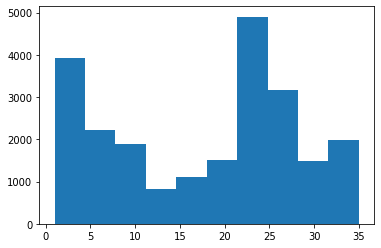

In [ ]:
ds[0]['video'].shape

torch.Size([3, 8, 256, 256])

  0%|          | 0/23039 [00:00<?, ?it/s]